# PROJECT TITLE: ESTIMATE THE ANNUAL MEDICAL EXPENDITURE FOR NEW CUSTOMER
# Author: Ian Farai Madhara

In [99]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from urllib.request import urlretrieve
from typing import Optional
%matplotlib inline

## Step 1: Understanding the dataset
For loading data i Created a helper function to load data from repo

In [100]:

def load_dataset(url:str,filename:str="insurance.csv")->None:
    urlretrieve(url, filename) 

#### The dataset for this project is hosted here [Insurance Data](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv)

In [101]:
insurance_data_url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv"
load_dataset(insurance_data_url)

In [102]:
# Reading csv file
df = pd.read_csv("insurance.csv")

In [103]:
# preview data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [104]:
# checking the number of rows  and columns
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

There are 1338 rows and 7 columns


In [105]:
# Checking column names and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Step 2 Summarizing the data

In [106]:
# Looking at summary statistics,This allows for possible inferences like distribution, skewness
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [107]:
# Summary for categorical
df['sex'].value_counts() # checking counts for sex

sex
male      676
female    662
Name: count, dtype: int64

In [108]:
# checking number of unique sex
df['sex'].nunique()

2

In [109]:
# checking foe number of smokers
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [110]:
# check for number of unique values
df['smoker'].nunique()

2

In [111]:
# checking for number of regions
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [112]:
# checking for unique values
df['region'].nunique()

4

In [113]:
df.isnull().sum() # Investigate nulls in the data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Since there is no column with NaN, we won't have to worry about imputing any column values using different imputation strategies like mean, median, most_frequent or constant

In [114]:
df.duplicated().sum() # check for duplicate
df = df.drop_duplicates() # removing duplicates

## Step 3: Exploratory Analysis and Visualization

#### Correlation

In [115]:
from sklearn.preprocessing import LabelEncoder
#sex
temp = df.copy()
le = LabelEncoder()
le.fit(temp.sex)
temp.sex = le.transform(temp.sex)
# smoker or not
le.fit(df.smoker) 
temp.smoker = le.transform(temp.smoker)
#region
le.fit(temp.region)
temp.region = le.transform(temp.region)
temp.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Have encoded the categorical variables to numeric form before testing for covariance

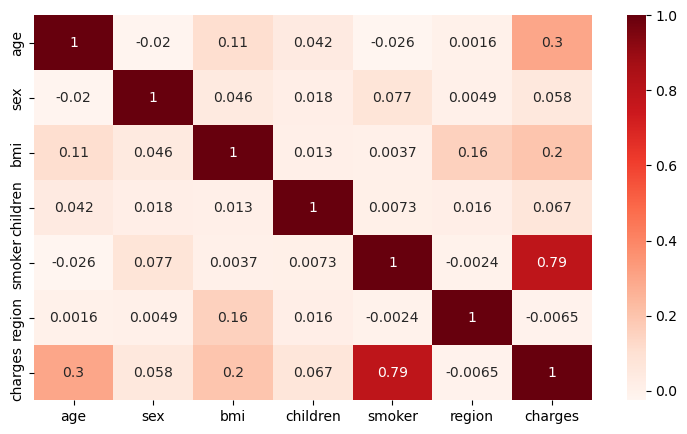

In [116]:
figure, ax = plt.subplots(figsize=(9,5))
corr = temp.corr() # return correlation matrix
sns.heatmap(corr,cmap='Reds',annot=True)
plt.show()

We see a strong correlation between smoking and charges, since there is no correlation between charges and region, i will not worry about it in my analysis, though children has a low correlation i will investigate it in detail

#### Body Max Index

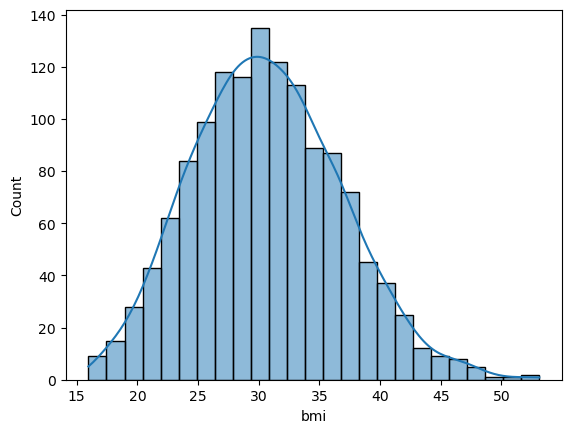

In [117]:
sns.histplot(data=df, x="bmi", kde=True)
plt.show()

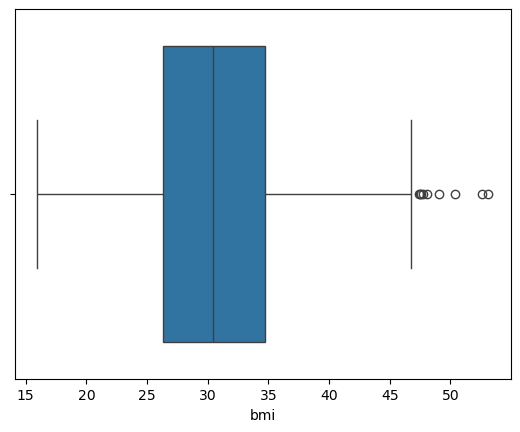

In [118]:
sns.boxplot(x=df["bmi"])
plt.show()

The BMI seems to follow a normal distribution with a mean of around 30, which basically translate to obesity, there seem to be a few outliers toward the right tail of the distribution

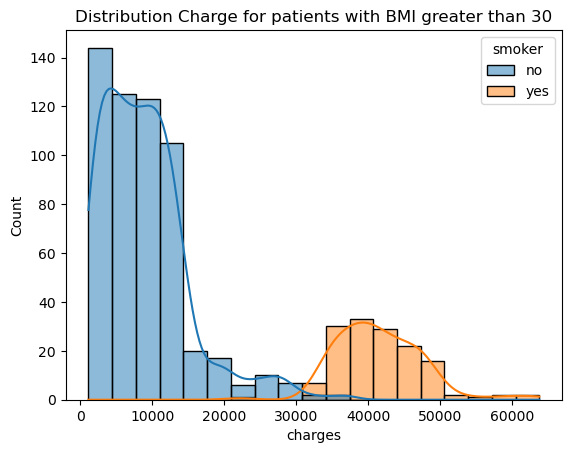

In [119]:
plt.title("Distribution Charge for patients with BMI greater than 30")
sns.histplot(data=df[df['bmi'] >= 30],x="charges",kde=True,hue="smoker")
plt.show()

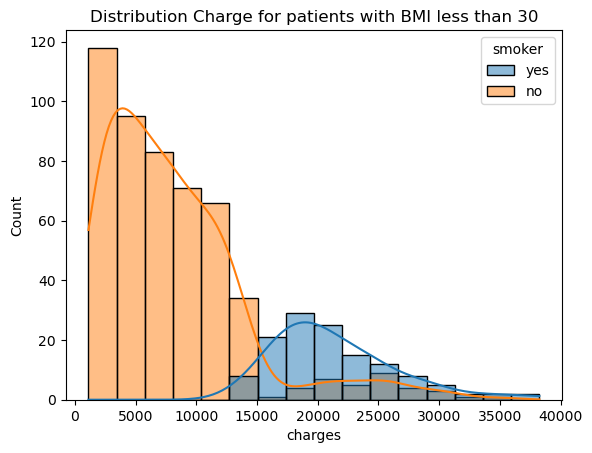

In [120]:
plt.title("Distribution Charge for patients with BMI less than 30")
sns.histplot(data=df[df['bmi'] < 30],x="charges",kde=True,hue="smoker")
plt.show()

It appears patients with BMI less than 30 spend less on medical charges compared to those with a higher BMI, let's exercise folks!. Also in some cases non smoking patient with bmi less than 30 seem to be spending less compared to non smokers with BMi greater than 30, maybe those non smokers have serious medical issues and these smokers do not have major issues.

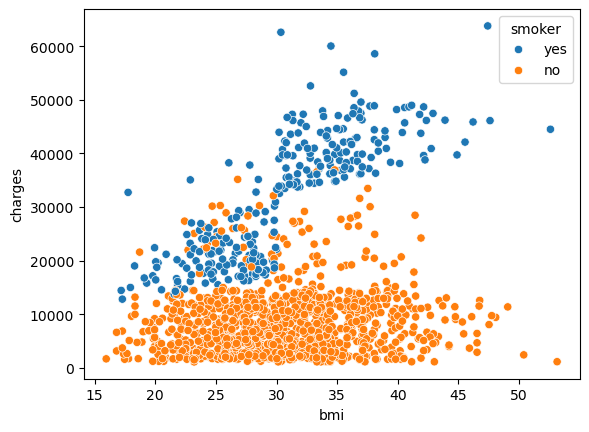

In [121]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker')
plt.show()

The trend is still the same here, for non smokers an increase in BMI does not correspond to an increase in charges, even though there are a few outliers, maybe its those non smokers with major medical issues since its happening even for those with low BMI which is considered healthy. Its clear that for smokers an increase in BMI is related to an increase in medical expenses and there is a jump from 30.

#### Age

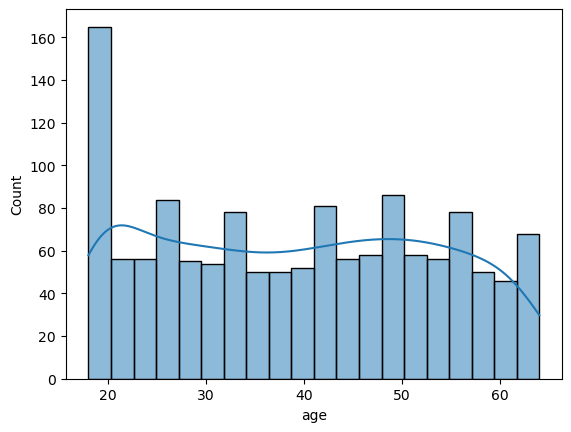

In [122]:
sns.histplot(data=df,x=df['age'],kde=True,bins=20)
plt.show()

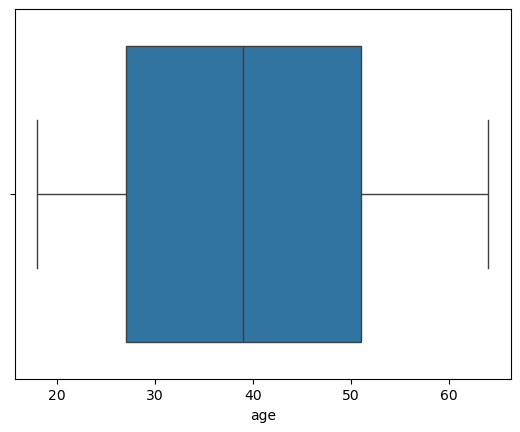

In [123]:
sns.boxplot(x=df['age'])
plt.show()

The age seem to follow a uniform distribution, with between 40- 60 customers in each age range, except for those below 20 years who have almost double as many customers as other ages

Text(0.5, 1.0, 'Ages vs Smoking')

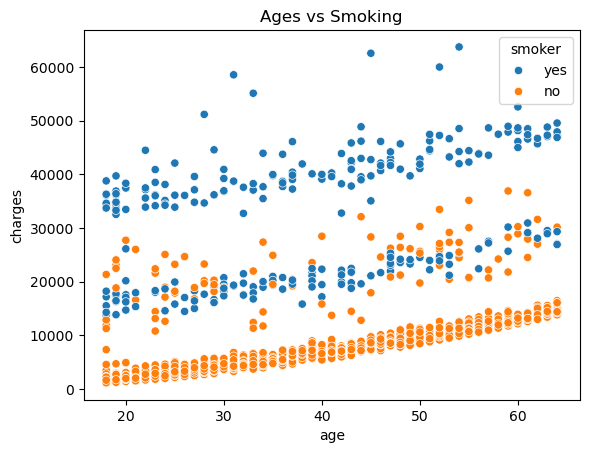

In [124]:
sns.scatterplot(data=df,x="age",y="charges",hue="smoker")
plt.title("Ages vs Smoking")

There is a positive correlation between age and charges, as people gets old, the charges increase as well, there seems to be three segments in our data, those that do not smoke and are paying less on treatment, then another group  of both smokers and non smokers in the middle, maybe its non smokers with serious diseases and healthy non smokers, the last group is only smokers who are paying more on treatment but not increase nearly as much as non smokers as they grow older

#### Children

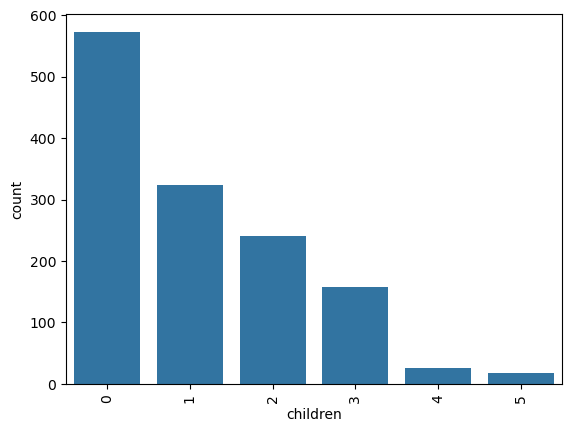

In [125]:
sns.countplot(x=df["children"])
plt.xticks(rotation=90)
plt.show()

Most people do not have kids which seems to be the trend in the developed world where people are not having kids, which explains the right skew

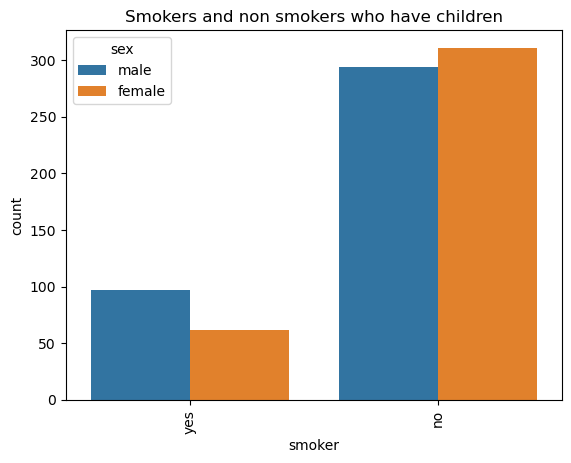

In [126]:
sns.countplot(x=df["smoker"],hue="sex", data=df[df['children'] > 0])
plt.xticks(rotation=90)
plt.title("Smokers and non smokers who have children")
plt.show()

From the above data, there are more non smoking parents which i think is generally a good trend healthy wise

#### Smoker

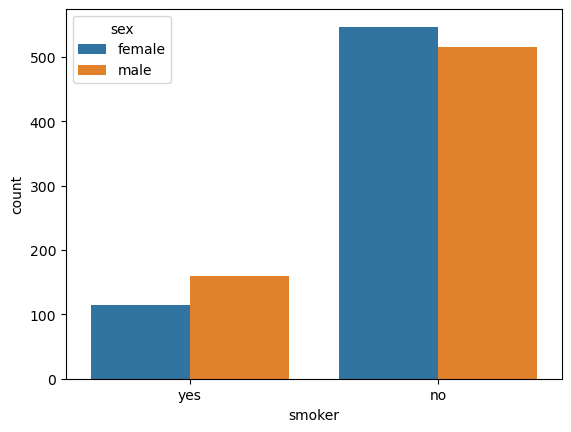

In [127]:
sns.countplot(data=df,x='smoker',hue="sex")
plt.show()

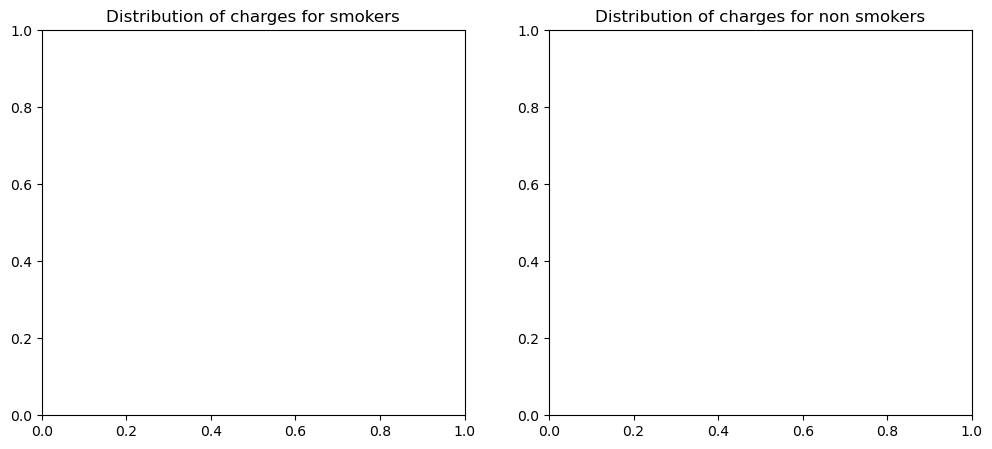

In [128]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
sns.histplot(df[df["smoker"]==1]["charges"],color="c")
ax.set_title("Distribution of charges for smokers")

ax = fig.add_subplot(122)
sns.histplot(df[df["smoker"]==0]["charges"],color="b")
ax.set_title("Distribution of charges for non smokers")
plt.show()

Most people in this dataset do not smoke and among those who smoke it appears male smokers are more. Also those who smoke spend more on medical expensives than those who do not.

### Region

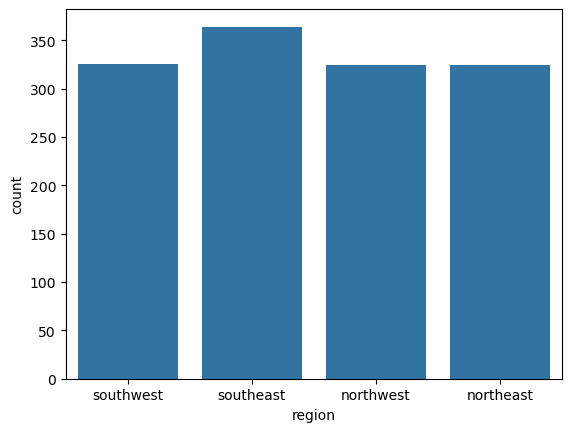

In [129]:
sns.countplot(data=df,x="region")
plt.show()

#### Charges

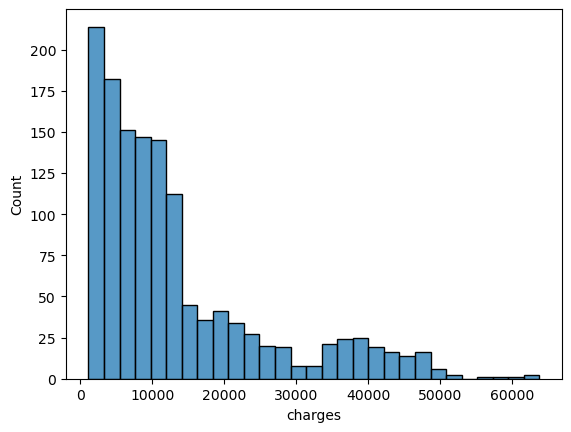

In [130]:
sns.histplot(df,x="charges")
plt.show()

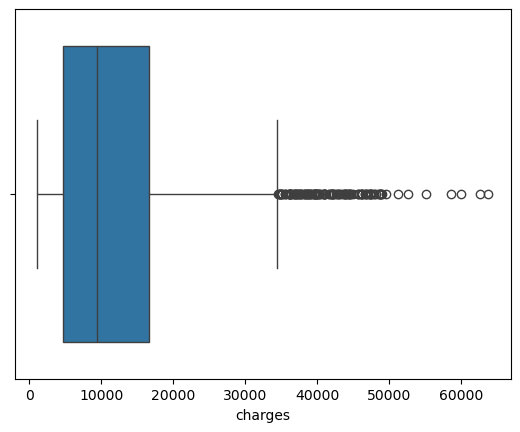

In [131]:
sns.boxplot(df,x="charges")
plt.show()

So far i can only see the that there is a right skweness on the charges and a lot of outliers implying there are inviduals who are paying more and anothers who are paying less. Would need to investigate this further

## Step 4 Handling Data Issues

### Smoker
Encoding smoker by creating a new column

In [132]:
# creating new column to map categorical column smoker to an integer value
smoker_codes = {'no': 0, 'yes': 1}
df['smoker_code'] = df.smoker.map(smoker_codes)
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


### Sex
Encoding sex by creating a new column

In [133]:
# creating new column to map categorical column sex to an integer value
sex_codes = {'female': 0, 'male': 1}
df['sex_code'] = df.sex.map(sex_codes)
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


### Region
One Encoding region by creating a new column

In [134]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
# Printing out categories to properly create dataframe with these arrays
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [135]:
encoded_regions_arr = enc.transform(df[['region']]).toarray()
df[['northeast', 'northwest', 'southeast', 'southwest']] = encoded_regions_arr
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


## Feature Enginnering

In [136]:
df['BMI_Category'] = pd.cut(df['bmi'], bins=[0,18.5,24.9,29.9,np.inf], labels=['Underweight','Normal','Overweight','Obese'])
df['Age_Group'] = pd.cut(df['age'], bins=[17,29,50,np.inf], labels=['Young Adult','Middle-Age','Senior'])
df['Obese_Smoker'] = ((df['smoker'] == 'yes') & (df['BMI_Category'] == 'Obese')).astype(int)
df['Has_Children'] = (df['children'] > 0).astype(int)
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest,BMI_Category,Age_Group,Obese_Smoker,Has_Children
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0,Overweight,Young Adult,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0,Obese,Young Adult,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0,Obese,Young Adult,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0,Normal,Middle-Age,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0,Overweight,Middle-Age,0,0


## Scaling
For this one we are going to scale since the features have different ranges e.g bmi ranges between 15 to 40 and sex_code between 0 and 1 etc.
We will use StandardScaler from scikit-learn

In [137]:
from sklearn.preprocessing import StandardScaler
#Only scaling numeric columns
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

# Storing scaled inputs into variable
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.44041773, -0.45315959, -0.90923416],
       [-1.51164747,  0.50942165, -0.07944162],
       [-0.79935006,  0.3831546 ,  1.58014347],
       ...,
       [-1.51164747,  1.01448983, -0.90923416],
       [-1.29795825, -0.79752426, -0.90923416],
       [ 1.55123139, -0.26129928, -0.90923416]], shape=(1337, 3))

In [138]:
# Extracting categorical columns values
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = df[cat_cols].values
categorical_data

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]], shape=(1337, 6))

In [139]:
inputs = np.concatenate((scaled_inputs,categorical_data),axis=1)
inputs_df = pd.DataFrame(inputs,columns=np.concatenate((numeric_cols,cat_cols)))
inputs_df.head()

,age,bmi,children,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,-1.440418,-0.453160,-0.909234,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.511647,0.509422,-0.079442,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.799350,0.383155,1.580143,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.443201,-1.305052,-0.909234,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.514431,-0.292456,-0.909234,0.0,1.0,0.0,1.0,0.0,0.0


## Model buiding

In [140]:
# Define features and target
X = df.drop(['charges'], axis=1)
y = df['charges']

## Train test split

In [141]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
## Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = ['sex', 'smoker', 'region', 'BMI_Category', 'Age_Group']
numerical_cols = ['age', 'bmi', 'children', 'Obese_Smoker', 'Has_Children']

# Preprocessor with scaling for Ridge and RF
preprocessor_scaled = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

## First Model - RIDGE
Since this is a regression model i will start with Ridge which is also a good choice because it prevents overfitting since its a regularized type

In [143]:
# Ridge Regression Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('regressor', Ridge())
])
ridge_params = {
    'regressor__alpha': [0.01, 0.1, 1, 10, 100],
    'regressor__fit_intercept': [True, False],
    'regressor__solver': ['auto', 'svd', 'cholesky']
}
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)
ridge_best = ridge_grid.best_estimator_

## Second Model - Decision Tree
For the second model we tried the decision tree since its also easy to interpret and is best used in this case since we want to be able to justify why certain customers are billed that way. Also since scaling is not needed we create another preprocessor that does not include scaling since it splits data based on feature threshold, it is invariant to scaling

In [144]:
# Decision Tree pipeline
from sklearn.tree import DecisionTreeRegressor
preprocessor_passthrough = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_passthrough),
    ('regressor', DecisionTreeRegressor(random_state=42))
])
tree_params = {
    'regressor__max_depth': [3, 4, 5, 6, 7, 8],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}
tree_grid = GridSearchCV(tree_pipeline, tree_params, cv=5, scoring='r2')
tree_grid.fit(X_train, y_train)
tree_best = tree_grid.best_estimator_

## Third Model - RandomForestRegressor
For the third one thought i should try RandomForest regressor an ensemble method which is usually preferred to DecisionTrees as it avoids overfitting

In [145]:
# Random Forest Pipeline
from sklearn.ensemble import RandomForestRegressor
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('regressor', RandomForestRegressor(random_state=42))
])
rf_params = {
    'regressor__n_estimators': [100, 150],
    'regressor__max_depth': [5, 10, None],
    'regressor__min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

## Evaluating Models

In [146]:
# Evaluate both models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
models = {
    'Ridge Regression': ridge_best,
    'Decision Tree': tree_best,
    'Random Forest': rf_best
}
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred)
    }
results_df = pd.DataFrame(results).T
results_df

,R2 Score,RMSE,MAE
Ridge Regression,0.905762,4161.348924,2359.616859
Decision Tree,0.900845,4268.532514,2507.256832
Random Forest,0.902769,4226.918147,2412.104297


From the above results, Ridge Regression performed the best overall across all metrics after scaling numeric features. Also DecisonTress given its simplicity surprisely offered some good perfomance relative to RandomForest which is a bit complicated. RandomForest whilst a great model did not outperform simpler Ridge though it was still better than DecisionTree but not by much.